# Optimizer Example
MNIST ANN example showing comparison between *newer* optimizers.

Richard Henry, 15-Jul-2024 

In [1]:
#Import Libararies
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

Test Libraries

In [2]:
# Check python version
from platform import python_version
print(python_version())
#3.12.3

3.12.3


In [3]:
# Check tensorflow version
tf.__version__
#2.16.1

'2.16.2'

In [4]:
# Check keras version
tf.keras.__version__
#3.4.1

'3.4.1'

# MNIST ANN

Here we are looking at optimizers that appeared *after* Adam.

Adapted from mvsjober on Github.
https://github.com/CSCfi/machine-learning-scripts/blob/master/notebooks/keras-mnist-mlp.ipynb

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28)
batch_size = 128
num_epochs = 15

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Build & train model function
def model_build(myOpti,
                myClas,
                myShap,
                myBatc,
                myEpoc,
                myxTra,
                myyTra,
                myxTes,
                myyTes):
    #Build it exactly the same every time
    tf.random.set_seed(19) 
    model = tf.keras.Sequential(
        [
            tf.keras.Input(shape=myShap),
            #tf.keras.layers.Rescaling(1.0/255),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, 
                                  activation="relu"),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Dense(64, 
                                  activation="relu"),
            tf.keras.layers.Dropout(0.15),
            tf.keras.layers.Dense(myClas, 
                                  activation="softmax"),
        ]
    )
    model.compile(loss="categorical_crossentropy", 
                  optimizer=myOpti, 
                  metrics=["accuracy"])
    myHis=model.fit(myxTra, 
                    myyTra, 
                    batch_size=myBatc, 
                    epochs=myEpoc, 
                    validation_split=0.1)
    score = model.evaluate(myxTes, 
                           myyTes, 
                           verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    return myHis

### First Model, LION

In [7]:
%%time
h0=model_build('lion',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.7804 - loss: 0.7100 - val_accuracy: 0.9633 - val_loss: 0.1316
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9308 - loss: 0.2301 - val_accuracy: 0.9675 - val_loss: 0.1165
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9393 - loss: 0.2080 - val_accuracy: 0.9727 - val_loss: 0.1018
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9452 - loss: 0.1906 - val_accuracy: 0.9725 - val_loss: 0.0987
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9501 - loss: 0.1795 - val_accuracy: 0.9722 - val_loss: 0.1070
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9496 - loss: 0.1857 - val_accuracy: 0.9712 - val_loss: 0.1096
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9490 - loss: 0.1768 - val_accuracy: 0.9723 - val_loss: 0.1117
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9520 - loss: 0.1756 - val_accu

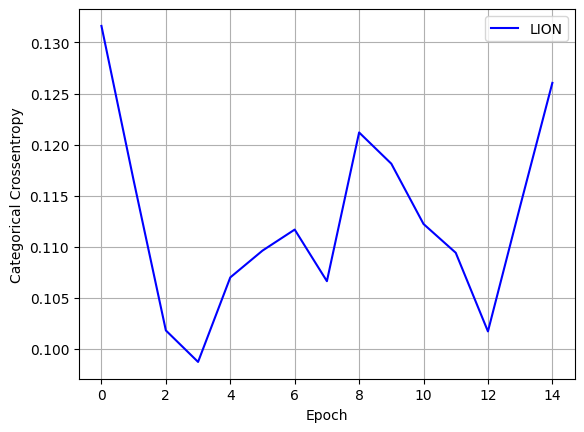

In [8]:
plt.plot(h0.history['val_loss'],color='blue',linestyle='solid')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['LION'])
plt.grid()
plt.show()

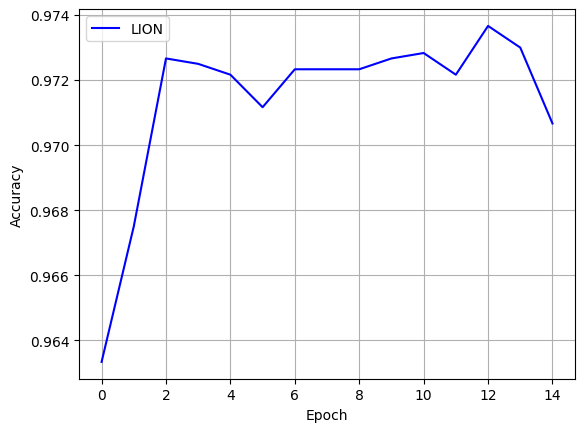

In [9]:
plt.plot(h0.history['val_accuracy'],color='blue',linestyle='solid')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION'])
plt.grid()
plt.show()

#### Commentary
Lorem Ipsum
### Second Model, AdaFactor

In [10]:
%%time
h1=model_build('adafactor',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.1139 - loss: 2.3030 - val_accuracy: 0.1050 - val_loss: 2.3026
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.1149 - loss: 2.3026 - val_accuracy: 0.1050 - val_loss: 2.3026
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1149 - loss: 2.3026 - val_accuracy: 0.1050 - val_loss: 2.3026
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1149 - loss: 2.3026 - val_accuracy: 0.1050 - val_loss: 2.3026
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.1149 - loss: 2.3026 - val_accuracy: 0.1050 - val_loss: 2.3026
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1149 - loss: 2.3025 - val_accuracy: 0.1050 - val_loss: 2.3025
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1149 - loss: 2.3025 - val_accuracy: 0.1050 - val_loss: 2.3025
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1149 - loss: 2.3025 - val_accura

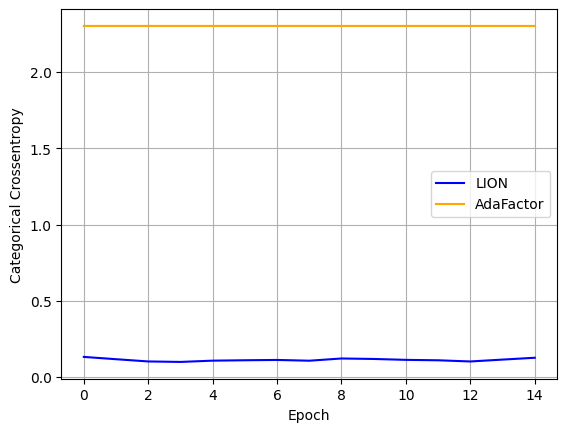

In [11]:
plt.plot(h0.history['val_loss'],color='blue',linestyle='solid')
plt.plot(h1.history['val_loss'],color='orange',linestyle='solid')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor'])
plt.grid()
plt.show()

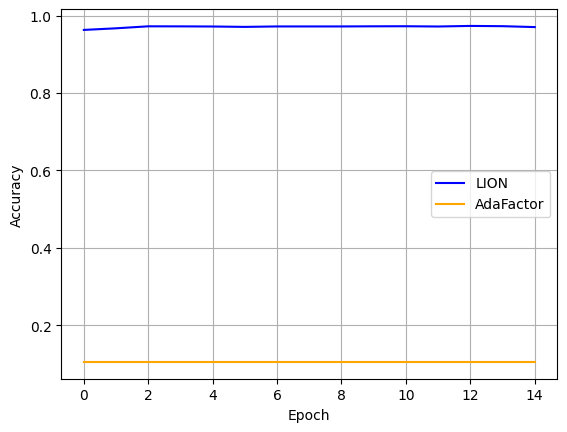

In [12]:
plt.plot(h0.history['val_accuracy'],color='blue',linestyle='solid')
plt.plot(h1.history['val_accuracy'],color='orange',linestyle='solid')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor'])
plt.grid()
plt.show()

#### Commentary
Lorem Impsum
### Third Model, Adam + Weight Decay

In [13]:
%%time
h2=model_build('adamw',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7577 - loss: 0.7990 - val_accuracy: 0.9598 - val_loss: 0.1461
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9322 - loss: 0.2313 - val_accuracy: 0.9678 - val_loss: 0.1125
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9475 - loss: 0.1751 - val_accuracy: 0.9717 - val_loss: 0.0916
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9565 - loss: 0.1449 - val_accuracy: 0.9743 - val_loss: 0.0869
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9630 - loss: 0.1213 - val_accuracy: 0.9742 - val_loss: 0.0835
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9661 - loss: 0.1116 - val_accuracy: 0.9770 - val_loss: 0.0770
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9695 - loss: 0.0939 - val_accuracy: 0.9792 - val_loss: 0.0719
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9715 - loss: 0.0921 - val_acc

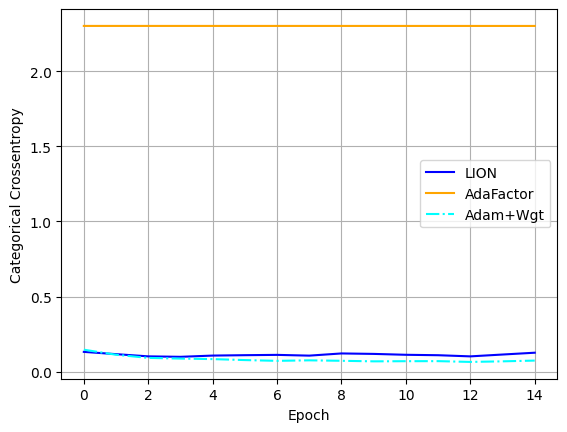

In [14]:
plt.plot(h0.history['val_loss'],color='blue',linestyle='solid')
plt.plot(h1.history['val_loss'],color='orange',linestyle='solid')
plt.plot(h2.history['val_loss'],color='cyan',linestyle='dashdot')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','Adam+Wgt'])
plt.grid()
plt.show()

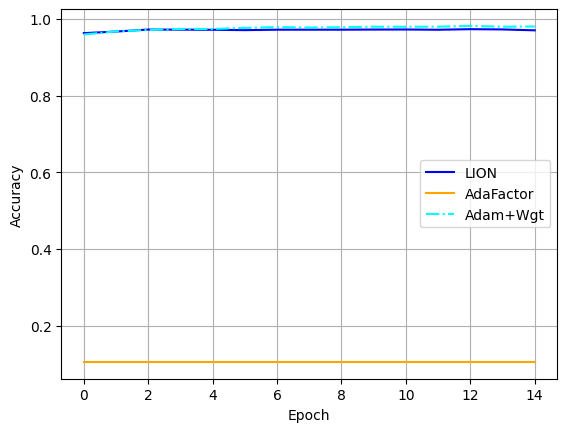

In [15]:
plt.plot(h0.history['val_accuracy'],color='blue',linestyle='solid')
plt.plot(h1.history['val_accuracy'],color='orange',linestyle='solid')
plt.plot(h2.history['val_accuracy'],color='cyan',linestyle='dashdot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','Adam+Wgt'])
plt.grid()
plt.show()

#### Commentary
Lorem Ipsum
### 4th Model, Adam

In [16]:
%%time
h3=model_build('adam',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7459 - loss: 0.8206 - val_accuracy: 0.9582 - val_loss: 0.1503
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9313 - loss: 0.2329 - val_accuracy: 0.9668 - val_loss: 0.1101
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9502 - loss: 0.1699 - val_accuracy: 0.9723 - val_loss: 0.0909
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9589 - loss: 0.1388 - val_accuracy: 0.9773 - val_loss: 0.0803
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9640 - loss: 0.1162 - val_accuracy: 0.9797 - val_loss: 0.0743
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9660 - loss: 0.1072 - val_accuracy: 0.9773 - val_loss: 0.0739
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9705 - loss: 0.0968 - val_accuracy: 0.9793 - val_loss: 0.0707
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9719 - loss: 0.0885 - val_accuracy

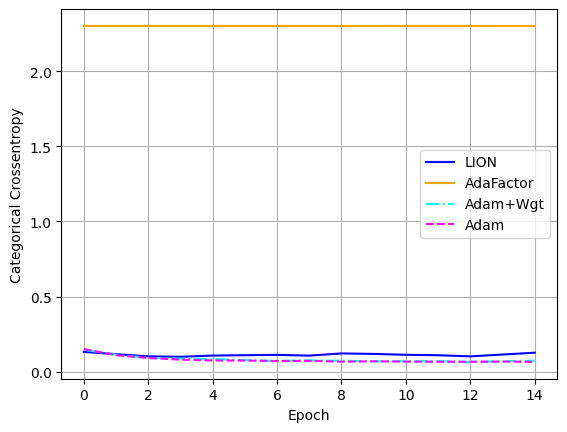

In [17]:
plt.plot(h0.history['val_loss'],color='blue',linestyle='solid')
plt.plot(h1.history['val_loss'],color='orange',linestyle='solid')
plt.plot(h2.history['val_loss'],color='cyan',linestyle='dashdot')
plt.plot(h3.history['val_loss'],color='magenta',linestyle='dashed')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','Adam+Wgt','Adam'])
plt.grid()
plt.show()

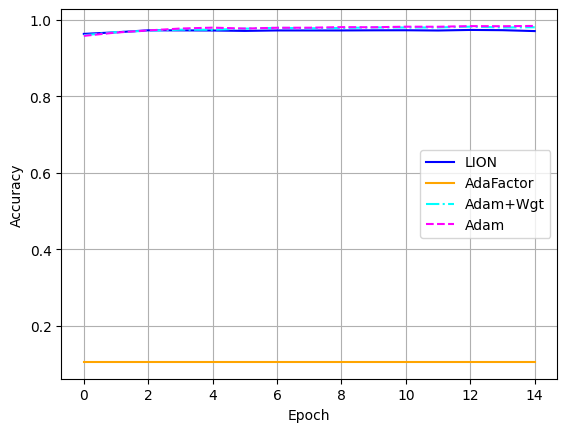

In [18]:
plt.plot(h0.history['val_accuracy'], color='blue',linestyle='solid')
plt.plot(h1.history['val_accuracy'], color='orange',linestyle='solid')
plt.plot(h2.history['val_accuracy'], color='cyan',linestyle='dashdot')
plt.plot(h3.history['val_accuracy'], color='magenta',linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','Adam+Wgt','Adam'])
plt.grid()
plt.show()

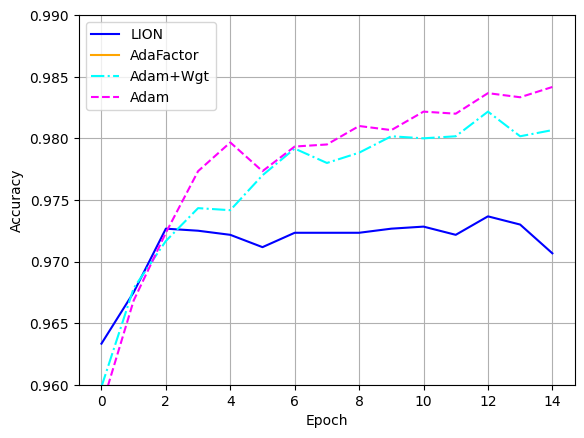

In [19]:
plt.plot(h0.history['val_accuracy'], color='blue',linestyle='solid')
plt.plot(h1.history['val_accuracy'], color='orange',linestyle='solid')
plt.plot(h2.history['val_accuracy'], color='cyan',linestyle='dashdot')
plt.plot(h3.history['val_accuracy'], color='magenta',linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','Adam+Wgt','Adam'])
plt.grid()
plt.ylim([0.96,0.99])
plt.show()

#### Comment
lorem ipsum
# Conclusions
Blah blah blah